# Setup

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdax
%matplotlib inline  

In [56]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

In [57]:
from datetime import datetime
from datetime import timedelta
import calendar

In [58]:
plotly.tools.set_credentials_file(username='gasia4444', api_key='rC8FB3pveGzyME366dL7')

# plotly.tools.set_credentials_file(username='gasia44', api_key='WquddqqfPKg5KJfPJFuk')

# Read Data

### Price

In [59]:
df_1 = pd.read_csv('bitcoin_data_one_minute_2016_2017.csv', parse_dates = ['timestamp']).set_index('timestamp')

In [60]:
df_2 = pd.read_csv('bitcoin_data_one_minute_2017_2018.csv', parse_dates = ['timestamp']).set_index('timestamp')

In [61]:
# df_3 = pd.read_csv('bitcoin_data_one_minute_2015_2016.csv', parse_dates = ['timestamp']).set_index('timestamp')

In [62]:
frames = [df_1, df_2]
btc_price_df = pd.concat(frames)

In [63]:
btc_price_df.sort_index(inplace=True)

In [64]:
btc_price_df.index = pd.to_datetime(btc_price_df.index)

-----------------------

### Forum

In [65]:
btc_forum_df = pd.read_csv('btc_forum_cleaned_new_pos_neg_sub.csv')
btc_forum_df.set_index('timestamp', inplace=True)
btc_forum_df.index = pd.to_datetime(btc_forum_df.index)

# clear seconds

In [66]:
btc_price_df.index = btc_price_df.index.map(lambda x: x.replace(second=0))
btc_forum_df.index = btc_forum_df.index.map(lambda x: x.replace(second=0))

-----------------

# price average 5 min

In [67]:
btc_price_df['mean'] = btc_price_df.loc[:,["close", 'open', 'low', 'high']].mean(axis = 1)

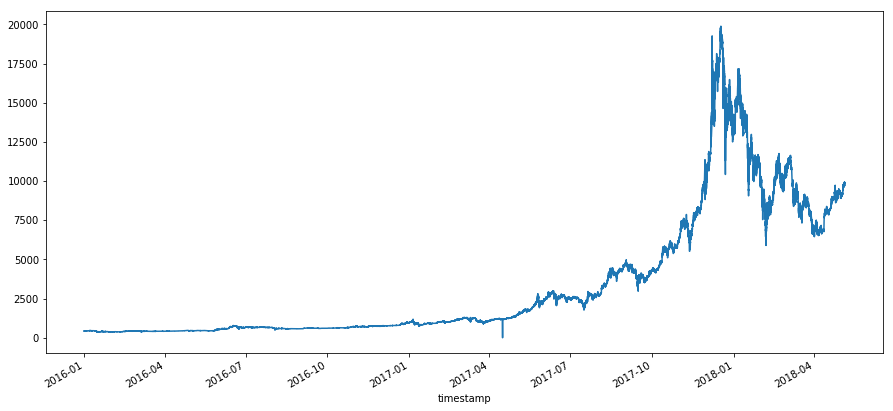

In [68]:
btc_price_df['mean'].plot(figsize = (15,7))

In [69]:
btc_forum_df['price_change'] = 0.0
btc_forum_df['mins_before'] = 0.0
btc_forum_df['mins_after'] = 0.0
# btc_forum_df['number_of_posts_before'] = 0
# btc_forum_df['number_of_posts_after'] = 0
# btc_forum_df['number_of_posts_ratio'] = 0.0

In [70]:
from tqdm import tqdm_notebook

In [71]:
len(btc_forum_df)

503816

In [72]:
minutes_time = 5
min_range = 160000
max_range = 200000
btc_forum_df = btc_forum_df[min_range:max_range]

for reply_index in tqdm_notebook(range(len(btc_forum_df))):
    mins_before = btc_price_df[(btc_forum_df.index[reply_index] - timedelta( minutes = minutes_time)):btc_forum_df.index[reply_index] - timedelta( minutes = 1)]['mean'].mean()
    mins_after = btc_price_df[btc_forum_df.index[reply_index]:(btc_forum_df.index[reply_index] + timedelta( minutes = minutes_time))]['mean'].mean()
    btc_forum_df['mins_before'][reply_index] = mins_before
    btc_forum_df['mins_after'][reply_index] = mins_after
    btc_forum_df['price_change'][reply_index] = np.log(mins_after/ mins_before)  
    
#     mins_before_post = btc_forum_df[(btc_forum_df.index[reply_index] - timedelta( minutes = minutes_time)):btc_forum_df.index[reply_index] - timedelta( minutes = 1)]
#     mins_after_post = btc_forum_df[btc_forum_df.index[reply_index]:(btc_forum_df.index[reply_index] + timedelta( minutes = minutes_time))]
    
#     btc_forum_df['number_of_posts_before'][reply_index] = len(mins_before_post)
#     btc_forum_df['number_of_posts_after'][reply_index] = len(mins_after_post)
#     try:
#         btc_forum_df['number_of_posts_ratio'][reply_index] = len(mins_after_post)/len(mins_before_post)
#     except:
#         pass

A Jupyter Widget

/Users/hrachkhachatryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/hrachkhachatryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/hrachkhachatryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [73]:
btc_forum_df.to_csv('btc_mins_'+str(min_range)+'_'+str(max_range)+'.csv')

In [74]:
# df1 = pd.read_csv('btc_mins_250001_300000.csv')

In [75]:
# len(saved)